<h2>Desafio 2 - Machine Learning


<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
    

**Desafio 2** : Aplicar las tecnicas de Machine Learning para calcular el precio por metro cuadrado de las propiedades.

In [1053]:
import numpy as np
import pandas as pd
import re

# Libreria Grafica.
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Visualización
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter # Para imprimir los %
from bokeh.tile_providers import CARTODBPOSITRON, get_provider, Vendors 
from bokeh.resources import INLINE

# Libreria para analisis ML
from sklearn import datasets, linear_model

pd.set_option('display.max_columns', 100) # Para mostrar todas las columnas
pd.set_option('display.max_rows', 100) # Para mostrar todas las filas

In [1054]:
# Definimos la ruta de la información.
data_propiedades = "Data/properati.csv"

# Leemos los datos del archivo
data = pd.read_csv(data_propiedades, sep=",", encoding="UTF-8")

# Chequeamos que los datos se hayan importado correctamente
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
84958,84958,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,NaN,NaN,NaN,95500.0,USD,1685049.75,95500.00,NaN,43.0,NaN,2220.930233,NaN,NaN,NaN,http://www.properati.com.ar/1b2e0_venta_depart...,"Departamento ubicado en 6º piso, tipologia ""F""...",Departamento en General Paz,https://thumbs4.properati.com/8/xfrgLWRZb1VB3l...
117738,117738,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,NaN,NaN,NaN,1630000.0,ARS,1612996.49,91416.39,30.0,24.0,3047.213000,67916.666667,NaN,NaN,2000.0,http://www.properati.com.ar/1cdwz_venta_depart...,Monoambiente ubicado en el área de máxima conc...,Departamento - Balvanera,https://thumbs4.properati.com/5/QdnTb6abvnq28b...
52512,52512,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,NaN,225000.0,USD,3970012.50,225000.00,53.0,51.0,4245.283019,4411.764706,NaN,2.0,NaN,http://www.properati.com.ar/19jag_venta_depart...,2 AMB. - FULL AMENITIES CON RENTA DE $15000 (C...,2 AMB. - FULL AMENITIES - COCHERA,https://thumbs4.properati.com/4/JChkVD1FFcDSuS...
55173,55173,sell,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,3429760.0,"-34.6169424082,-58.3622277614",-34.616942,-58.362228,330000.0,USD,5822685.00,330000.00,70.0,70.0,4714.285714,4714.285714,NaN,2.0,NaN,http://www.properati.com.ar/19oks_venta_depart...,"Olga Cossettini 1500, Puerto Madero Departamen...",Venta 2 Ambientes - Edificio Brisas Puerto Madero,https://thumbs4.properati.com/9/EGT9DMwlqL-Tnr...
81282,81282,sell,apartment,Garín,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ga...,Argentina,Bs.As. G.B.A. Zona Norte,3433844.0,NaN,NaN,NaN,3540000.0,ARS,3503072.15,198536.21,NaN,94.0,NaN,37659.574468,NaN,NaN,NaN,http://www.properati.com.ar/1axtw_venta_depart...,"Departamento con Seguridad 24hs, Escobar, Garí...",Departamento - Garin,https://thumbs4.properati.com/6/exakt588Cp4h-s...


In [1055]:
# Chequeamos cantidad de registros y cantidad de columnas
data.shape

(121220, 26)

<h2>Selección de los datos</h2>

En base a los análisis previos realizados sobre el Dataset, tomaremos los datos de CABA únicamente para realizar un modelo de machine learning. 

In [1056]:
# Creamos una máscara y la aplicamos al dataframe anterior para traer los registros que necesitamos
data_caba_mask = data.state_name == 'Capital Federal' 
data_caba = data.loc[data_caba_mask, :]

# Chequeamos cómo quedaron los datos
data_caba.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...


In [1057]:
data_caba.shape

(32316, 26)

In [1058]:
data_caba.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

<a id="section_dataset_nulos"></a> 
<h3>Cálculo de cantidad de nulos</h3>

[volver a TOC](#section_toc)

In [1059]:
# # Calculamos cantidad de nulos por campo
# cant_nulos_por_campo = data_caba.isnull().sum()
# cant_nulos_por_campo

In [1060]:
# # Calculamos porcentaje de nulos por campo
# cant_registros = data_caba.shape[0]
# print(f'Cantidad Original de registros: {cant_registros}\n')
# #len(data.index) es lo mismo

# porc_nulos_por_campo = np.round((100 * cant_nulos_por_campo / cant_registros),2)
# print(porc_nulos_por_campo)

<h4> Distribución de <strong>property_type</strong>

In [1061]:
# Contamos cantidad de valores de cada elemento en property_type y operation para ver distribución
property_type_count = data_caba.property_type.value_counts()
print(f'property_type: \n{property_type_count}')

property_type: 
apartment    27037
house         2087
PH            1828
store         1364
Name: property_type, dtype: int64


In [1062]:
# # Convertimos el count anterior en las categorías del gráfico
# categories = np.array(property_type_count.index)

# cord_x = data_caba.property_type.value_counts() / data_caba.shape[0]
# palette = ['#440154', '#29788E', '#22A784', '#FDE724']

# p = figure(x_range=categories, plot_width=500, plot_height=200)
# p.vbar(x=categories, top=cord_x, width=0.6,
#        color=palette)

# p.yaxis.formatter = NumeralTickFormatter(format='0 %')
# output_notebook(resources=INLINE)
# show(p)

<h4>Distribución de <strong>currency</strong></h4>

In [1063]:
data_caba.currency.value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

<h4>Distribución de <strong>barrio</strong></h4>

In [1064]:
place_name_count = data_caba.place_name.value_counts()
# place_name_count.sort_index()
place_name_count

Belgrano                2992
Palermo                 2885
Caballito               2273
Villa Urquiza           1629
Recoleta                1547
Flores                  1354
Villa Crespo            1331
Capital Federal         1297
San Telmo               1216
Almagro                 1165
Barrio Norte            1140
Boedo                    890
Nuñez                    778
Balvanera                667
Puerto Madero            647
San Cristobal            614
Saavedra                 542
Monserrat                538
Palermo Hollywood        532
Floresta                 516
Villa del Parque         488
Villa Luro               432
Barracas                 425
Villa Devoto             420
Mataderos                418
Liniers                  408
Palermo Soho             394
Colegiales               352
Parque Patricios         322
Congreso                 304
Coghlan                  259
Retiro                   248
Palermo Chico            232
Chacarita                227
Centro / Micro

<h2>Limpieza de Datos</h2>

<a id="section_dataset_drop"></a> 
<h3> Drop de columnas innecesarias </h3>

[volver a TOC](#section_toc)

In [1065]:
# Creamos la lista de columnas a filtrar
drop_columns = ['Unnamed: 0', 'operation', 'place_with_parent_names', 'country_name', 'state_name', 'geonames_id', 'lat-lon','lat', 'lon',
               'expenses','properati_url','title', 'image_thumbnail']

data_caba_clean = data_caba.drop(drop_columns, axis=1)
data_caba_clean.head(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
0,PH,Mataderos,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
2,apartment,Mataderos,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3,PH,Liniers,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...
7,apartment,Belgrano,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8,apartment,Belgrano,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...



<h3> Limpiamos <strong>currency</strong> </h3>

[volver a TOC](#section_toc)

In [1066]:
# Creamos una mask para traer los valores en monedas que no son USD ni ARS.
currency_OTHER_CURRENCY_mask = (data_caba_clean.currency == 'PEN') | (data_caba_clean.currency == 'UYU')
# Observamos esos registros
data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :]

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
50387,apartment,Capital Federal,380000.0,PEN,2066864.90,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...
50388,apartment,Capital Federal,950000.0,PEN,5167162.35,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...


In [1067]:
# Hacemos drop de esos registros y chequeamos la diferencia entre cantidad original y actual
cant_registros = data_caba_clean.shape[0]
# Dropeamos las moneda PEN y UYU ## OJO la moneda UYU era de una propiedad en Mendoza.
data_caba_clean.drop(data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :].index, inplace = True) 
# Verificamos.
print(f'Cantidad de registros original - registro actuales: {cant_registros - data_caba_clean.shape[0]}')

Cantidad de registros original - registro actuales: 2


<h3> Limpiamos <strong>place_name</strong> </h3>

[volver a TOC](#section_toc)

In [1068]:
# Dropeamos los de Capital Federal
capi_mask = data_caba_clean.place_name == 'Capital Federal'
data_caba_clean.drop(data_caba_clean.loc[capi_mask, :].index, inplace=True)

# Chequeamos cómo quedaron los datos
data_caba_clean.shape

(31019, 13)

<h3> Volvemos a calcular cantidad de nulos luego de eliminar columnas y registros

In [1069]:
# Calculamos cantidad de nulos por campo
cant_nulos_por_campo = data_caba_clean.isnull().sum()
cant_nulos_por_campo

property_type                     0
place_name                        0
price                          2959
currency                       2959
price_aprox_local_currency     2959
price_aprox_usd                2959
surface_total_in_m2            5707
surface_covered_in_m2          1963
price_usd_per_m2               8416
price_per_m2                   4570
floor                         28070
rooms                         15748
description                       0
dtype: int64

In [1070]:
# Calculamos porcentaje de nulos por campo
cant_registros = data_caba_clean.shape[0]
print(f'Cantidad Original de registros: {cant_registros}\n')
#len(data.index) es lo mismo

porc_nulos_por_campo = np.round((100 * cant_nulos_por_campo / cant_registros),2)
print(porc_nulos_por_campo)

Cantidad Original de registros: 31019

property_type                  0.00
place_name                     0.00
price                          9.54
currency                       9.54
price_aprox_local_currency     9.54
price_aprox_usd                9.54
surface_total_in_m2           18.40
surface_covered_in_m2          6.33
price_usd_per_m2              27.13
price_per_m2                  14.73
floor                         90.49
rooms                         50.77
description                    0.00
dtype: float64


In [1071]:
data_caba_clean.shape

(31019, 13)

In [1072]:
data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
27770,apartment,Palermo,250000.0,USD,4411125.00,250000.0,74.0,64.0,3378.378378,3906.250000,NaN,3.0,Unidad de 3 ambientes de 74 m2 totales al cont...
18258,apartment,Recoleta,510000.0,USD,8998695.00,510000.0,169.0,159.0,3017.751479,3207.547170,NaN,NaN,CODIGO: 877-188 ubicado en: Arroyo 800 - Publ...
26624,apartment,Congreso,650000.0,USD,11468925.00,650000.0,38.0,38.0,17105.263158,17105.263158,NaN,1.0,Departamentos de 1 ambiente y medioTotalmente...
44639,apartment,Parque Chas,150960.0,USD,2663613.72,150960.0,70.0,52.0,2156.571429,2903.076923,NaN,2.0,Departamentos en Venta a Estrenar en Parque C...
25748,apartment,Boedo,425600.0,USD,7509499.20,425600.0,30.0,30.0,14186.666667,14186.666667,NaN,1.0,FNB319- EN LA MEJOR UBICACION Y CON LA MEJOR F...


## De los datos filtrados según Desafio 1 deberiamos:

1. Terminar de dropear variables incompletas que serian necesarias para poder entrenar un modelo. (ejemplo: si la propiedad no posee: price, price_aprox_local_currency,price_usd_per_m2, price_per_m2, etc...) la información de los barrios ya fue analizado y dropeado en el paso anterior.
2. Definir las variables CUANTITATIVAS, ejemplo precio, total de m2 de superficie.
3. Armar las variables CUALITATIVAS, Dummy (ejemplo: place_name, property_type, amenities, rooms).
4. Armar una nueva variable Dummy que contemple los precios de propiedad segun su distribución por metro cuadrado. Utilizando Panda CUT. 

## Finalizado el analisis de datos, armamos diferentes modelos para predecir el precio de la propiedad.

1. Regresion Lineal Multiple
2. Entrenar los modelos con Lasso, RidgeCV y utilizando Cross Validation.



### Primero damos homogenidad a los datos

Vamos a realizar ciertas verificaciones de los datos.

In [1073]:
# 1. Verificamos que el price y el price_aprox_usd sean los mismos, y luego si fuera así dropeamos el price_aprox_usd

mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd

display(data_caba_clean.loc[mask_price_validation, :].shape)

# Detectamos que hay 4138 propiedades donde los valores son diferentes? pero estan en Pesos o son NaN?

display(data_caba_clean.loc[mask_price_validation, :].sample(10))

# Detectamos que tenemos los dos casos, donde los precios son NaN y donde la moneda está en ARS (lo cual no estaría mal)
# En el caso de ARS, vemos que el valor de price toma el de la moneda local ~ Por lo que podriamos llegar a eliminar price, currency y price_aprox_local_currency 

# Para los valores de NaN tendriamos que tomar la decisión si los dropeamos o tratamos de calcular un precio promedio en base a la cantidad de metros cuadrados.

(4138, 13)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
117789,apartment,San Telmo,1338232.0,ARS,1324272.12,75052.97,36.0,32.0,2084.804722,41819.750000,NaN,NaN,Formando Parte del Barrio de San Telmo: Caract...
76412,apartment,Palermo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monoambiente en venta en el barrio de Las Cañi...
121004,apartment,Belgrano,NaN,NaN,NaN,NaN,46.0,42.0,NaN,NaN,NaN,NaN,Torre de 16º pisos ubicado en pleno centro com...
91268,apartment,Belgrano,5519502.0,ARS,5461924.84,309553.96,86.0,71.0,3599.464651,77739.464789,NaN,NaN,El emprendimiento tiene unidades entre mediane...
105145,apartment,Boedo,1570000.0,ARS,1553622.39,88051.37,35.0,30.0,2515.753429,52333.333333,NaN,NaN,"QUINTO PISO AL FRENTEedificio de categoria, pl..."
99170,apartment,Belgrano,5998300.0,ARS,5935728.19,336406.71,93.0,68.0,3617.276452,88210.294118,NaN,NaN,EL PROYECTOLibérateur se encuentra...
120899,apartment,Villa Crespo,NaN,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...
85788,apartment,Barrio Norte,NaN,NaN,NaN,NaN,81.0,42.0,NaN,NaN,NaN,NaN,FORMA DE PAGO: A CONVENIR BBU2985 AP195141
77803,apartment,Caballito,NaN,NaN,NaN,NaN,49.0,44.0,NaN,NaN,NaN,NaN,"Departamento de 2 ambientes, al frente con bal..."
47164,apartment,Villa Urquiza,6087387.0,ARS,6023885.93,341403.04,NaN,121.0,NaN,50308.983471,2.0,1.0,Corredor Responsable: Jorge Salafia - CUCICBA ...


In [1074]:
data_caba_clean.shape

(31019, 13)

<h3> Eliminamos registros según un umbral de datos faltantes </h3>

[volver a TOC](#section_toc)

In [1075]:
# Elimino primero los registros donde no tengo nada de informacion. 

umbral = 10
data_caba_clean.dropna(axis = 0, thresh=umbral, inplace=True)
# OJO que utilizando umbral de 10 se fueron casi 10000 datos incompletos. 
#--> se pierden 6000 datos aprox (ver shape de abajo), un 20% de los datos aprox

# Vuelvo a ver como quedaron los datos
mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd
display(data_caba_clean.loc[mask_price_validation, :].shape)

display(data_caba_clean.shape)
# display(data_caba_clean.loc[mask_price_validation, :].head(30))
data_caba_clean.sample(5)

(1131, 13)

(25627, 13)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
79643,apartment,San Cristobal,121500.0,USD,2143806.75,121500.0,69.0,61.0,1760.869565,1991.803279,NaN,NaN,VENTA DEPARTAMENTO/OFICINA 3 AMBIENTES EN SAN ...
94597,apartment,Recoleta,710000.0,USD,12527595.00,710000.0,182.0,182.0,3901.098901,3901.098901,NaN,NaN,Excelente Piso en Callao y Quintana. Edificio ...
111429,apartment,Flores,195000.0,USD,3440677.50,195000.0,NaN,100.0,NaN,1950.000000,6.0,4.0,Corredor Responsable: Lucas Federico Delgado -...
53658,house,Saavedra,490000.0,USD,8645805.00,490000.0,567.0,261.0,864.197531,1877.394636,NaN,NaN,CASA DE 5 AMBIENTES CON DEPENDENCIA EN 2 PLANT...
99888,apartment,Belgrano,160000.0,USD,2823120.00,160000.0,62.0,62.0,2580.645161,2580.645161,NaN,NaN,VENTA DEPARTAMENTO 3 AMBIENTES EN BELGRANO/NUÑ...


In [1076]:
# Para la superficie de metros cuadadros totales, podemos creer que en caso de ser Nan 
#es porque es un departamente sin balcon y la cantidad de m2 cubierta sería iguala la cantidad de m2 totales.data_caba

data_caba_clean.surface_total_in_m2.fillna(data_caba_clean.surface_covered_in_m2 + (data_caba_clean.surface_covered_in_m2 * 0.10), inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
46960,PH,Palermo,375000.0,USD,6616687.50,375000.0,260.0,110.0,1442.307692,3409.090909,NaN,NaN,ARGAÃARAS 47 Ciudad autonoma de Buenos AiresEn...
60657,apartment,Caballito,140000.0,USD,2470230.00,140000.0,65.0,51.0,2153.846154,2745.098039,NaN,2.0,Hermoso 2 Ambientes de 65m2 en el emprendimien...
111824,apartment,Monserrat,98000.0,USD,1729161.00,98000.0,46.0,39.0,2130.434783,2512.820513,NaN,NaN,Departamentos en venta con piso flotante mela...
100101,apartment,Villa del Parque,245100.0,USD,4324666.95,245100.0,85.0,77.0,2883.529412,3183.116883,NaN,NaN,LAS FRESIAS GARDEN - VILLA DEL PARQUE Hermosa ...
25725,apartment,San Cristobal,869500.0,USD,15341892.75,869500.0,40.0,40.0,21737.500000,21737.500000,NaN,1.0,SJN237-MEJOR INVERTI EN CABA SIN NINGUN ANTIC...


<h3> Completamos datos faltantes de superficie </h3>

[volver a TOC](#section_toc)

In [1077]:
# Idem al punto anterior pero ahora de surface_total a surface_covered

data_caba_clean.surface_covered_in_m2.fillna(data_caba_clean.surface_total_in_m2, inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
63652,apartment,Palermo Hollywood,320000.0,USD,5646240.00,320000.0,70.0,70.0,4571.428571,4571.428571,NaN,2.0,"Dúplex de 70m2. en donde en el nivel inferior,..."
116930,apartment,Almagro,150000.0,USD,2646675.00,150000.0,79.0,66.0,1898.734177,2272.727273,NaN,3.0,DEPARTAMENTO 3 AMBIENTES AL FRENTE CON BALCON...
64719,apartment,Palermo,175000.0,USD,3087787.50,175000.0,62.0,58.0,2822.580645,3017.241379,NaN,NaN,VENTA DOS AMBIENTES C/DEPENDENCIA EN PALERMOD...
89008,apartment,Villa Urquiza,124440.0,USD,2195681.58,124440.0,50.0,40.0,2488.800000,3111.000000,NaN,NaN,Torre Giga se ubica a pasos de las Avenidas Tr...
109731,apartment,Villa Urquiza,118000.0,USD,2082051.00,118000.0,74.0,65.0,1594.594595,1815.384615,NaN,3.0,"EXCELENTE 3 AMBIENTES AL FRENTE, CON GRAN BALC..."


<h3> Completamos datos faltantes de price_usd_per_m2 </h3>

[volver a TOC](#section_toc)

In [1078]:
# Idem al punto anterior pero ahora calculamos el precio por metro cuadrado.

data_caba_clean.price_usd_per_m2.fillna(data_caba_clean.price_aprox_usd / data_caba_clean.surface_total_in_m2, inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
56212,apartment,Flores,3066400.0,ARS,3034412.53,171974.98,77.0,64.0,2233.441299,47912.500000,NaN,NaN,"Venta de Departamento 3 AMBIENTES en Flores, C..."
42848,apartment,Recoleta,690000.0,USD,12174705.00,690000.00,319.0,330.0,2163.009404,2090.909091,1.0,NaN,CARACTERISTICAS Superficie Terreno: 330 m2Supe...
63672,PH,Belgrano,129900.0,USD,2292020.55,129900.00,50.0,47.0,2598.000000,2763.829787,NaN,3.0,"EXCELENTE PH DE 3 AMBIENTES INTERNO, CON PATIO..."
48070,apartment,Caballito,114500.0,USD,2020295.25,114500.00,45.0,41.0,2544.444444,2792.682927,NaN,2.0,"Edificio EL CID, ubicado en el centro de la ci..."
62821,apartment,Palermo,250000.0,USD,4411125.00,250000.00,107.0,98.0,2336.448598,2551.020408,NaN,4.0,DEPARTAMENTO 4 AMBIENTES CON DEPENDENCIA - COC...


<h3> Eliminamos floor </h3>

[volver a TOC](#section_toc)

In [1079]:
display(data_caba.floor.isnull().count())

# El piso es un dato muy incompleto por lo que se dropea

# Dropeamos la columna creada anteriormente.
data_caba_clean.drop(columns=['floor'], inplace=True)

# En el caso de Rooms lo reemplazamos por 0 --> Lo pasé más abajo
# data_caba_clean.rooms.fillna(0, inplace=True)

32316

In [1080]:
display(data_caba.rooms.count())
# En el caso de rooms, podemos tomar que el dato para los NaN es 0?? modifica esto el analisis para predecir? 

15325

<h3> Eliminamos columnas de precios en moneda local </h3>

[volver a TOC](#section_toc)

In [1081]:
# Dropeamos los valores que sabemos que está repetidos o con otra moneda.data_caba

data_caba_clean.drop(columns=['price', 'currency','price_per_m2', 'price_aprox_local_currency'], inplace=True)

data_caba_clean.sample(20)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description
25636,apartment,Boedo,34200.00,30.0,30.0,1140.000000,1.0,B835-UNICO PROYECTO PREMIUM- PISCINAS DE BOEDO...
6834,apartment,Barrio Norte,285000.00,82.0,71.0,3475.609756,NaN,CODIGO: 3040-SantaFe28433445 ubicado en: Av. S...
117757,apartment,Villa Urquiza,214000.00,80.0,68.0,2675.000000,NaN,Depto Semipiso 3AMB - 80m2 Totales (68m2 Cub +...
25926,apartment,Boedo,478200.00,43.0,43.0,11120.930233,2.0,GL823- COMBO DEPA + PISCINA EN CUOTAS DESDE $ ...
71754,apartment,Villa del Parque,90000.00,42.0,40.0,2142.857143,NaN,"En el residencial barrio de Villa del Parque ,..."
46695,apartment,Las Cañitas,245800.00,81.0,71.0,3034.567901,3.0,Una excelente oportunidad de inversión en el c...
14611,apartment,Retiro,200000.00,83.6,76.0,2392.344498,3.0,"Venta - Departamento - Argentina, Buenos Aires..."
72903,apartment,Palermo,139000.00,52.0,49.0,2673.076923,NaN,"Excelente ubicacion Av. Córdoba y Bulnes, a me..."
21792,apartment,Barrio Norte,170000.00,56.0,56.0,3035.714286,3.0,Venta de Departamento 3 AMBIENTES en Barrio No...
99110,apartment,Belgrano,115459.46,36.0,29.0,3207.207222,NaN,EL PROYECTOLibérateur se encuentra...


<h3> Nuevo recuento de nulos </h3>

In [1082]:
print('\nPorcentaje de valores incompletos por columna:')
print(f'{round(100 * data_caba_clean.isnull().sum()/data_caba_clean.shape[0], 2)}')

display(data_caba_clean.shape)


Porcentaje de valores incompletos por columna:
property_type             0.00
place_name                0.00
price_aprox_usd           0.00
surface_total_in_m2       0.00
surface_covered_in_m2     0.00
price_usd_per_m2          0.00
rooms                    43.82
description               0.00
dtype: float64


(25627, 8)

<h3>Creación de una columna para categorizar por metros cuadrados

In [1083]:
# Delimitamos los bins para realizar un cut
# bins = [20, 30, 45, 75, 150, 220]
bins = [0, 30, 45, 75, 150, 220]
labels = ['mono', 's45', 's75', 's150', 'm220' ]

data_caba_clean['m2_categories'] = pd.cut(data_caba_clean.surface_covered_in_m2, bins, labels)
data_caba_clean['m2_labels'] = pd.cut(x=data_caba_clean.surface_covered_in_m2, bins=bins, labels=labels, right=False)


In [1084]:
data_caba_clean.m2_categories.value_counts().sort_index()

(0, 30]       2530
(30, 45]      7452
(45, 75]      7227
(75, 150]     5449
(150, 220]    1572
Name: m2_categories, dtype: int64

In [1085]:
data_caba_clean.m2_labels.value_counts().sort_index()

mono    1633
s45     7863
s75     7475
s150    5574
m220    1628
Name: m2_labels, dtype: int64

<a id="section_caba_description"></a> 
<h3> Análisis del campo <strong>description</strong></h3>

[volver a TOC](#section_toc)

Normalización del campo, todo minuscula, sin tildes, etc

In [1086]:
data_caba_clean.description = data_caba_clean.description.str.lower()

data_caba_clean.description.sample(10)

78089     excelente departamento de dos ambientes en niv...
24878     departamento de 81 m2, piso 4to, en monserrat....
26072     sj128- con balcon sobre avenida living y dormi...
29        departamento muy luminoso con todos sus ambien...
77978     venta departamento de 2 ambientes en edificio ...
6237      diseño moderno pisos flotantes y excelentes te...
55229     http:// medidas son aproximadas y al solo efec...
31907     venta de departamento 2 ambientes en flores, i...
119296    aire acondicionado.molduras.aberturas alemanas...
113127    venta de departamento 3 dormitorios en belgran...
Name: description, dtype: object

<a id="section_caba_description_amb"></a> 
<h4> Cantidad de ambientes</h4>

[volver a TOC](#section_toc)

In [1087]:
amb_pattern = "((?P<numero_amb>\d)(\s)?(amb|anv|amv|anb))"
amb_pattern_regex = re.compile(amb_pattern)

In [1088]:
amb_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      amb_pattern_regex.search(x))
mask_amb_match_notnull = amb_match.notnull()

# Aplicamos el grupo que encuentra el dígito de cantidad de ambientes, casteado como integer
data_caba_clean.loc[mask_amb_match_notnull, 'number_rooms'] = \
amb_match.loc[mask_amb_match_notnull].apply(lambda x: int(x.group("numero_amb")))

In [1089]:
dorm_pattern = "((?P<numero_dorm>\d)(\s)?(dorm))"
dorm_pattern_regex = re.compile(dorm_pattern)

In [1090]:
dorm_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else dorm_pattern_regex.search(x))

mask_dorm_match_notnull = dorm_match.notnull()

data_caba_clean.loc[mask_dorm_match_notnull, 'number_rooms'] = \
dorm_match.loc[mask_dorm_match_notnull].apply(lambda x: int(x.group("numero_dorm"))+1)

#se asume que el numero de ambientes es numero_dorm +1

Tratamos de llenar los rooms que faltan con lo que obtuvimos de la descripción

In [1091]:
data_caba_clean.head(3)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,number_rooms
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,NaN,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,2.0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,NaN,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,2.0
7,apartment,Belgrano,138000.0,45.0,40.0,3066.666667,NaN,excelente monoambiente a estrenar amplio super...,"(30, 45]",s45,NaN


In [1092]:
data_caba_clean.rooms.isnull().sum()

11230

In [1093]:
data_caba_clean.number_rooms.isnull().sum()

9881

In [1094]:
data_caba_clean.rooms.fillna(data_caba_clean.number_rooms, inplace=True)

In [1095]:
data_caba_clean.rooms.isnull().sum()

4665

In [1096]:
# data_caba_clean.rooms.fillna(0, inplace=True)
# completar con los datos de categorias

In [1097]:
data_caba_clean.rooms.value_counts()

2.0     5406
3.0     5262
1.0     4341
4.0     4012
5.0     1266
6.0      362
7.0      174
8.0       57
9.0       27
10.0      24
12.0      11
11.0       9
0.0        4
17.0       3
22.0       1
15.0       1
14.0       1
13.0       1
Name: rooms, dtype: int64

In [1098]:
rooms_dict = {
"mono": 1, "s45":  2, "s75":  3, "s150":  4, "m220": 5}

data_caba_clean["rooms_upon_categories"] = data_caba_clean.m2_labels.map(rooms_dict)
data_caba_clean['rooms_upon_categories']

data_caba_clean.rooms.fillna(data_caba_clean.rooms_upon_categories, inplace=True)
data_caba_clean.rooms.isnull().sum()


763

### Llenamos los que faltan según las categorías de los bins???
Además: eliminar los que tengan más de 10 ambientes? Son pocos datos! 

<a id="section_caba_description_amb"></a> 
<h4> Amenities</h4>

[volver a TOC](#section_toc)

<h5> Pileta </h5>

In [1099]:
pileta_pattern = "(?P<pileta>pileta|piscina|picina|pisina|pool)"
pileta_pattern_regex = re.compile(pileta_pattern)

In [1100]:
pileta_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      pileta_pattern_regex.search(x))
mask_pileta_match_notnull = pileta_match.notnull()

data_caba_clean.loc[mask_pileta_match_notnull, 'pool'] = 1

In [1101]:
# data_caba_clean['pool']

In [1102]:
data_caba_clean['pool'].notnull().sum()

6161

In [1103]:
#Completamos los datos NaN con ceros (convertimos en una variable dummy)
data_caba_clean.pool.fillna(0, inplace = True)

<h5> Laundry </h5>

In [1104]:
laudry_pattern = "(?P<laundry>laundry|lavadero)"
laundry_pattern_regex = re.compile(laudry_pattern)

laundry_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      laundry_pattern_regex.search(x))
mask_laundry_match_notnull = laundry_match.notnull()

data_caba_clean.loc[mask_laundry_match_notnull, 'laundry'] = 1

In [1105]:
data_caba_clean['laundry'].notnull().sum()

10958

In [1106]:
data_caba_clean.laundry.fillna(0, inplace = True)

<h5> Parking </h5>

In [1107]:
parking_pattern = "(?P<parking>parking|estacionamiento|garage|cochera|garaje)"
parking_pattern_regex = re.compile(parking_pattern)

parking_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      parking_pattern_regex.search(x))
mask_parking_match_notnull = parking_match.notnull()

data_caba_clean.loc[mask_parking_match_notnull, 'parking'] = 1

In [1108]:
data_caba_clean['parking'].notnull().sum()

9796

In [1109]:
data_caba_clean.parking.fillna(0, inplace = True)

<h5> Gimnasio </h5>

In [1110]:
gym_pattern = "(?P<gimnasio>gim|gym|fitness|fitnes|ejercicio)"
gym_pattern_regex = re.compile(gym_pattern)

gym_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      gym_pattern_regex.search(x))
mask_gim_match_notnull = gym_match.notnull()

data_caba_clean.loc[mask_gim_match_notnull, 'gym'] = 1

In [1111]:
data_caba_clean['gym'].notnull().sum()

3363

In [1112]:
data_caba_clean.gym.fillna(0, inplace = True)

In [1113]:
# plt.figure(figsize=(13,10))
# sns.heatmap(data_caba_clean.corr(),annot=True)
# plt.title("Correlation Heatmap")
# plt.show()

<a id="section_caba_dummies"></a> 
<h3> Creación dummies sobre datos categóricos </h3>

[volver a TOC](#section_toc)

In [1114]:
# Usamos la función get_dummies con one-hot encoding (drop_first=True)
property_type_dummies = pd.get_dummies(data_caba_clean['property_type'], drop_first = True, prefix='prop_type')
property_type_dummies

,prop_type_apartment,prop_type_house,prop_type_store
0,0,0,0
2,1,0,0
7,1,0,0
8,1,0,0
13,1,0,0
...,...,...,...
121153,1,0,0
121157,1,0,0
121158,1,0,0
121215,1,0,0


In [1115]:
m2_labels_dummies = pd.get_dummies(data_caba_clean['m2_labels'], drop_first = True, prefix='m2_label')

In [1116]:
place_name_dummies = pd.get_dummies(data_caba_clean['place_name'], drop_first = True, prefix='place_name')

In [1117]:
# Hacemos un join para concatenar las columnas al dataframe
data_caba_clean = data_caba_clean.join([property_type_dummies,m2_labels_dummies, place_name_dummies])

In [1118]:
data_caba_clean.head(3)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,number_rooms,rooms_upon_categories,pool,laundry,parking,gym,prop_type_apartment,prop_type_house,prop_type_store,m2_label_s45,m2_label_s75,m2_label_s150,m2_label_m220,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Catalinas,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_Las Cañitas,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Palermo Chico,place_name_Palermo Hollywood,place_name_Palermo Soho,place_name_Palermo Viejo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,2,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,2.0,2,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,2,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,2.0,3,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,apartment,Belgrano,138000.0,45.0,40.0,3066.666667,2,excelente monoambiente a estrenar amplio super...,"(30, 45]",s45,NaN,2,1.0,1.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Falta reindexar las filas.

### Falta el dummy de Rooms pero primero hay que ver si completamos los datos con la info de los bins

In [1119]:
# Exportamos el archivo para usar en otras notebooks, esto lo guarda en el mismo directorio en el que estamos operando
# data_caba_clean.to_csv('data_caba_clean.csv')

In [1120]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics, linear_model

1. Primer modelo
Eliminar rooms nulos
Modelar 

2. Imputar datos faltantes en los rooms
modelar 

3. Eliminar outliers
modelar 

In [1121]:
# Funcion para realizar el entrenamiento pero con un set de testeo.

def graf_lineal_model(X, y, y_pred):
    # Graficamos el modelo
    plt.scatter(y_pred, y, s=30, c='b', alpha=0.4)
    plt.plot(y,y, '-.',c='g')
    plt.show()
    print(y.shape)
    print(y_pred.shape)
    return

def train_test_error(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
#    print (feature_cols)
#    print ("y_test sample: ",y_test.values[0:10])
#     print ("y_test sample: ",y_test)
#    print ("y_pred sample: ",y_pred[0:20].astype(int))
#    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    graf_lineal_model(X, y_test, y_pred)
    return 

def train_test_error_lazzo(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.LassoCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Imprime Alpha", model.alpha_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_ridge(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    #model = linear_model.Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
    model = linear_model.RidgeCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_elastic(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.ElasticNetCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

In [1122]:
display(data_caba_clean.columns)

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'description',
       'm2_categories', 'm2_labels', 'number_rooms', 'rooms_upon_categories',
       'pool', 'laundry', 'parking', 'gym', 'prop_type_apartment',
       'prop_type_house', 'prop_type_store', 'm2_label_s45', 'm2_label_s75',
       'm2_label_s150', 'm2_label_m220', 'place_name_Agronomía',
       'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
       'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
       'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
       'place_name_Centro / Microcentro', 'place_name_Chacarita',
       'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
       'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
       'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
       'place_name_Monserrat',

RMSE: 29676.697503514544
R2: 0.0021623787501081626


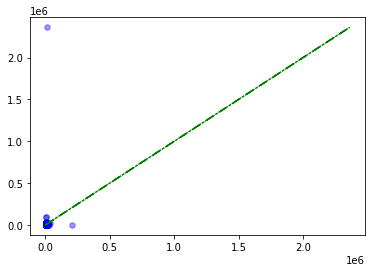

(6407,)
(6407,)


In [1123]:
# Regresion lineal Simple

feature_cols = ['price_aprox_usd']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)


RMSE: 31351.431669950027
R2: -0.11363658457882542


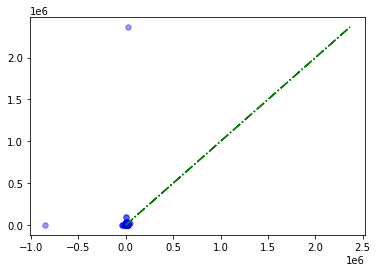

(6407,)
(6407,)


In [1124]:
feature_cols = ['surface_total_in_m2', 'price_aprox_usd', 'surface_covered_in_m2']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)


RMSE: 31303.053099118886
R2: -0.1102023185675356


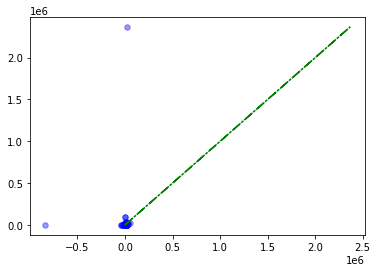

(6407,)
(6407,)


In [1125]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

{'alpha': 0.0636672972972973, 'scores': array([0.07533284, 0.19874048, 0.098415  ]), 'mean_score': 0.12416277591056779, 'zero_coefs': 0}
r^2: -0.09324738755090678
Imprime Alpha 0.0636672972972973


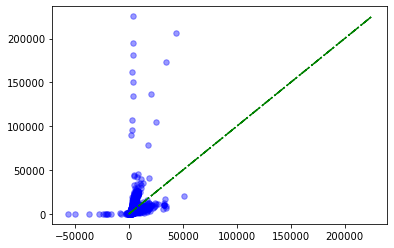

(19220,)
(19220,)


In [1126]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']
train_test_error_lazzo(feature_cols, target)

## Recordar que hay variables ROOM es INT!!!!

{'alpha': 0.03874486486486487, 'scores': array([0.00356508, 0.00201259, 0.00311627]), 'mean_score': 0.0028979800710049832, 'zero_coefs': 0}
r^2: -0.010591638526659786
Imprime Alpha 0.03874486486486487


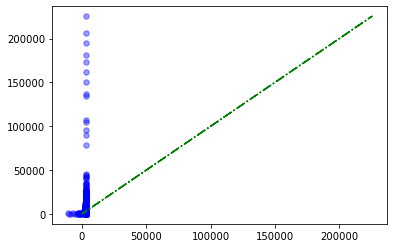

(19220,)
(19220,)


In [1127]:
feature_cols = ['surface_total_in_m2']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

{'alpha': 0.0636672972972973, 'scores': array([0.07533284, 0.19874048, 0.098415  ]), 'mean_score': 0.12416277591056779, 'zero_coefs': 0}
r^2: -0.09324738755090678
Imprime Alpha 0.0636672972972973


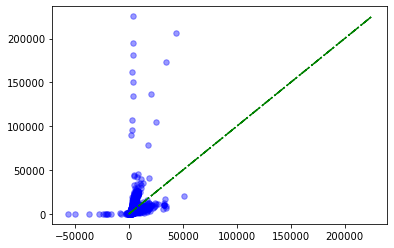

(19220,)
(19220,)


In [1128]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

# Necesitamos definir Outliers.

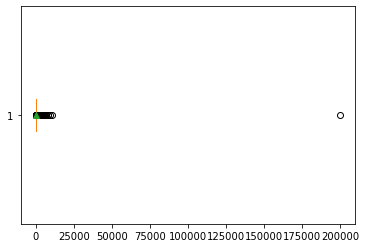

In [1129]:
fig, ax = plt.subplots()
bp = ax.boxplot(data_caba_clean['surface_covered_in_m2'].dropna(), vert=False, showmeans=True)


In [1157]:
# Definimos outliers aproximados
lower_bound = 0.01
upper_bound = 0.97
rest = data_caba_clean.price_usd_per_m2.quantile([lower_bound, upper_bound])
rest

0.01     991.625693
0.97    6789.909384
Name: price_usd_per_m2, dtype: float64

In [1158]:
# Creamos una mask entendiendo que los precios minimos y maximos pueden rondar los 600 USD y 4000 USD y fijamos outliers aproximados

precioxm2_mask = (data_caba_clean.price_usd_per_m2 >= rest[0.01]) & (data_caba_clean.price_usd_per_m2 <= rest[0.97])
data_caba_clean = data_caba_clean.loc[precioxm2_mask, :]

# Vuelvo a graficar.

plt.hist(data_caba_clean.price_usd_per_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Precio x M2'
plt.ylabel = 'Count'
plt.show()

print(data_caba_clean.price_usd_per_m2.max()) 
print(data_caba_clean.price_usd_per_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 3500...

KeyError: 0.99

In [ ]:
# Definimos outliers aproximados
lower_bound = 0.001
upper_bound = 0.99
rest = data_caba_clean.surface_covered_in_m2.quantile([lower_bound, upper_bound])
rest

In [ ]:
# Creamos una mask entendiendo que los precios minimos y maximos pueden rondar los 600 USD y 4000 USD y fijamos outliers aproximados

surface_xm2_mask = (data_caba_clean.surface_covered_in_m2 >= rest[0.001]) & (data_caba_clean.surface_covered_in_m2 <= rest[0.99])
data_caba_clean = data_caba_clean.loc[surface_xm2_mask, :]

# Vuelvo a graficar.

plt.hist(data_caba_clean.surface_covered_in_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Precio x M2'
plt.ylabel = 'Count'
plt.show()

print(data_caba_clean.surface_covered_in_m2.max()) 
print(data_caba_clean.surface_covered_in_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 3500...

In [ ]:
feature_cols = ['price_aprox_usd']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)


In [ ]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error(feature_cols, target)

In [ ]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error_lazzo(feature_cols, target)

In [ ]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

In [ ]:
X = data_caba_clean[['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
        'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Para tomar revisar!

In [ ]:
feature_cols = ['price_aprox_usd', 'place_name_Villa del Parque',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

In [ ]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2']
target = ['price_usd_per_m2']

train_test_error_ridge(feature_cols, target)

In [ ]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 
                'place_name_Agronomía', 'place_name_Villa del Parque',
                'place_name_Almagro', 'place_name_Balvanera', 'place_name_Barracas',
                'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
                'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
                'place_name_Centro / Microcentro', 'place_name_Chacarita',
                'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
                'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
                'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
                'place_name_Monserrat', 'place_name_Monte Castro', 'place_name_Nuñez',
                'place_name_Once', 'place_name_Palermo', 'place_name_Palermo Chico',
                'place_name_Palermo Hollywood', 'place_name_Palermo Soho',
                'place_name_Palermo Viejo', 'place_name_Parque Avellaneda',
                'place_name_Parque Centenario', 'place_name_Parque Chacabuco',
                'place_name_Parque Chas', 'place_name_Parque Patricios',
                'place_name_Paternal', 'place_name_Pompeya', 'place_name_Puerto Madero',
                'place_name_Recoleta', 'place_name_Retiro', 'place_name_Saavedra',
                'place_name_San Cristobal', 'place_name_San Nicolás',
                'place_name_San Telmo', 'place_name_Tribunales',
                'place_name_Velez Sarsfield', 'place_name_Versalles',
                'place_name_Villa Crespo', 'place_name_Villa Devoto',
                'place_name_Villa General Mitre', 'place_name_Villa Lugano',
                'place_name_Villa Luro', 'place_name_Villa Ortuzar',
                'place_name_Villa Pueyrredón', 'place_name_Villa Real',
                'place_name_Villa Riachuelo', 'place_name_Villa Santa Rita',
                'place_name_Villa Soldati', 'place_name_Villa Urquiza']
target = ['price_usd_per_m2']

train_test_error_elastic(feature_cols, target)